In [ ]:
# Import basic python libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Set warnings to ignore while execution.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import machine learning libraries from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
# Import metrics and accuracy calculation libs
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
# Load the dataset from excel file from sheet named Data_prep.
# This sheet is modified from original data sheet to remove 
#   irrelavant or blank columns and rows
cardio_df = pd.read_excel('CTG.xls', sheet_name='Data_prep')

In [ ]:
# View the contents of the dataset
ardio_df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [ ]:
# Get a list of columns in the dataset
col_names = cardio_df.columns
col_names

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'LB', 'AC1', 'FM1',
       'UC1', 'DL1', 'DS1', 'DP1', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width',
       'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'CLASS', 'NSP'],
      dtype='object')

In [ ]:
# use columns 10-32 and drop unnamed columns
valid_cols = cardio_df.columns[10:32]
cardio = cardio_df[valid_cols]
cardio.columns

Index(['AC1', 'FM1', 'UC1', 'DL1', 'DS1', 'DP1', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'CLASS', 'NSP'],
      dtype='object')

In [ ]:
# Recheck the dataset contents
cardio.head()

,AC1,FM1,UC1,DL1,DS1,DP1,ASTV,MSTV,ALTV,MLTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [ ]:
# View the size of the dataset
cardio.shape

(2129, 22)

In [ ]:
# View the columns and its data types.
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AC1       2126 non-null   float64
 1   FM1       2127 non-null   float64
 2   UC1       2127 non-null   float64
 3   DL1       2128 non-null   float64
 4   DS1       2128 non-null   float64
 5   DP1       2128 non-null   float64
 6   ASTV      2127 non-null   float64
 7   MSTV      2127 non-null   float64
 8   ALTV      2127 non-null   float64
 9   MLTV      2127 non-null   float64
 10  Width     2126 non-null   float64
 11  Min       2126 non-null   float64
 12  Max       2126 non-null   float64
 13  Nmax      2126 non-null   float64
 14  Nzeros    2126 non-null   float64
 15  Mode      2126 non-null   float64
 16  Mean      2126 non-null   float64
 17  Median    2126 non-null   float64
 18  Variance  2126 non-null   float64
 19  Tendency  2126 non-null   float64
 20  CLASS     2126 non-null   floa

In [ ]:
# Check for missing values in columns
cardio.isnull().sum()

AC1         3
FM1         2
UC1         2
DL1         1
DS1         1
DP1         1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
NSP         3
dtype: int64

In [ ]:
# Drop rows with null values
cardio.dropna(inplace=True)
cardio.isnull().sum()

AC1         0
FM1         0
UC1         0
DL1         0
DS1         0
DP1         0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

array([[<Axes: title={'center': 'NSP'}>]], dtype=object)

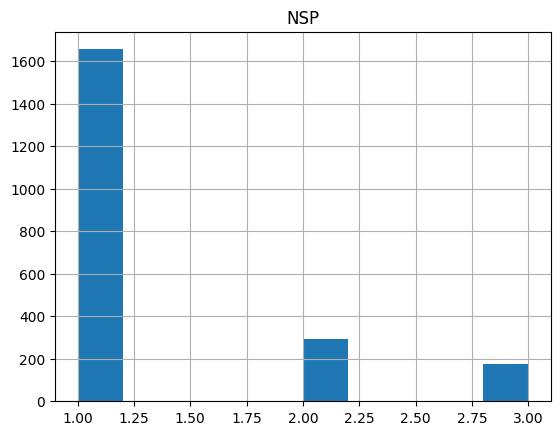

In [ ]:
# Plot and view the distribution of Target field, NSP
cardio.hist(column='NSP')

In [ ]:
# Create X Y i.e features(X) and target (y)
X = cardio.drop(['NSP'], axis=1)
y = cardio['NSP']

In [ ]:
# Show the correlation of features with NSP column
X.corrwith(cardio['NSP'])

AC1        -0.363849
FM1         0.087933
UC1        -0.203824
DL1         0.062702
DS1         0.135629
DP1         0.488277
ASTV        0.471191
MSTV       -0.103382
ALTV        0.426146
MLTV       -0.226797
Width      -0.068789
Min         0.063175
Mode       -0.250412
Mean       -0.226985
Median     -0.205033
Variance    0.206630
Tendency   -0.131976
CLASS       0.643034
dtype: float64

<Axes: title={'center': 'Correlation with Target'}>

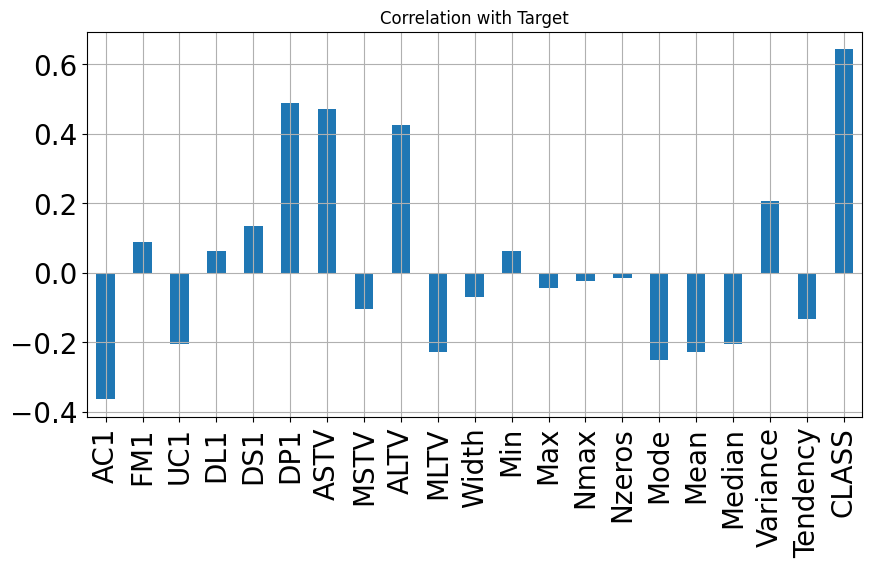

In [ ]:
# plot Correlation of features
X.corrwith(cardio['NSP']).plot.bar(
        figsize = (10, 5), title = "Correlation with Target", fontsize = 20,
        rot = 90, grid = True)

In [ ]:
# Drop fields with low correlation index
X.drop(['Max','Nmax','Nzeros'], axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AC1       2126 non-null   float64
 1   FM1       2126 non-null   float64
 2   UC1       2126 non-null   float64
 3   DL1       2126 non-null   float64
 4   DS1       2126 non-null   float64
 5   DP1       2126 non-null   float64
 6   ASTV      2126 non-null   float64
 7   MSTV      2126 non-null   float64
 8   ALTV      2126 non-null   float64
 9   MLTV      2126 non-null   float64
 10  Width     2126 non-null   float64
 11  Min       2126 non-null   float64
 12  Mode      2126 non-null   float64
 13  Mean      2126 non-null   float64
 14  Median    2126 non-null   float64
 15  Variance  2126 non-null   float64
 16  Tendency  2126 non-null   float64
 17  CLASS     2126 non-null   float64
dtypes: float64(18)
memory usage: 315.6 KB


In [ ]:
# Split the data into train - 80% amd test 20%
# This is part of cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Normalise the data so that values are uniform for machinelearning
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

## 1.  Classification using  Optimised K Nearest Neighbour

In [ ]:
# By Trial and Error method, find bvest K value for KNN using Grid Search
knn_model = KNeighborsClassifier()
params_val = {'n_neighbors':[3,4,5,6,8,10,12,14,16,18,20],
         'leaf_size':list(range(1,50,5))}

gridSrch = GridSearchCV(knn_model, param_grid= params_val, cv = 3,scoring = "roc_auc",verbose=1)
gridSrch.fit(X_train, y_train)
print('Best Score is :', gridSrch.best_score_)
print('Best Estimator is :',gridSrch.best_estimator_)
print('Best Params are :',gridSrch.best_params_)

Fitting 3 folds for each of 110 candidates, totalling 330 fits
Best Score is : nan
Best Estimator is : KNeighborsClassifier(leaf_size=1, n_neighbors=3)
Best Params are : {'leaf_size': 1, 'n_neighbors': 3}


In [ ]:
# Create a new KNN model with best parameterss found.
knn_model_opt = KNeighborsClassifier(n_neighbors=3)
knn_model_opt.fit(X_train, y_train)

# Predict the target class using the test data
pred_knn_opt = knn_model_opt.predict(X_test)

In [ ]:
# Calculate the accuracy of the KNN model
print(knn_model_opt.score(X_test, y_test))

0.9436619718309859


In [ ]:
# print the accuracy results

print ('accuracy =',accuracy_score(y_test, pred_knn_opt))

print("Recall Score : ",recall_score(y_test, pred_knn_opt, 
                                           pos_label='positive',
                                           average='micro'))
print("Precision Score : ",precision_score(y_test, pred_knn_opt, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, pred_knn_opt, 
                                           pos_label='positive',
                                           average='micro'))

accuracy = 0.9436619718309859
Recall Score :  0.9436619718309859
Precision Score :  0.9436619718309859
F1 Score :  0.9436619718309859


In [ ]:
# get the accuracy score for KNN
knn_acc = accuracy_score(y_test, pred_knn_opt)
knn_acc

0.9436619718309859

## 2. Classification using Suport Vector Machines

In [ ]:
# Set hyper paraeters for GridSearch to be used for Optimising the model
param_grid = [{'kernel': ['poly'], 'C' : [3, 5, 7, 9, 10]},
             {'kernel' : ['rbf'], 'C' : [3, 5, 7, 9, 10], 'gamma' : [2, 4, 6, 8]}]

svm = SVC()

In [ ]:
# Get the best SVM model that is optimised.
svm_best_model = GridSearchCV(svm, param_grid, return_train_score=True)

svm_best_model.fit(X_train, y_train)
svm_best_model.best_params_


{'C': 10, 'kernel': 'poly'}

In [ ]:
# Creating the SVC model using best params
y_pred = svm_best_model.predict(X_test)

In [ ]:
print ('accuracy =',accuracy_score(y_test, y_pred))

print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

accuracy = 0.9577464788732394
Recall Score :  0.9577464788732394
Precision Score :  0.9577464788732394
F1 Score :  0.9577464788732394


In [ ]:
# Store the accuracy of SVM
svm_acc = accuracy_score(y_test, y_pred)
svm_acc

0.9577464788732394

## 3.  Classification using Decistion Tree and PCA

In [ ]:
# Create principal components as method of best feature selection.
pca = PCA()
X_pca = pca.fit_transform(X_train)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-0.484862,-1.684876,0.533931,-0.764895,0.116078,0.718921,-0.998347,0.714687,0.726512,0.096680,-0.035643,0.200938,-0.229869,0.333965,-0.010850,0.361140,-0.020376,-0.186011
1,1.775185,-0.672810,-0.128905,-0.403692,-0.995410,-0.437126,0.214066,1.462191,0.023267,1.151556,0.280210,-0.658152,0.168277,0.169274,-0.155747,0.131977,0.050686,0.004824
2,-2.430061,-1.080981,-0.687113,-0.486544,0.184755,-0.146732,0.599461,-0.972667,-0.190823,-0.099273,-0.363426,0.162997,-0.016212,-0.254847,0.253423,-0.083960,0.014021,0.092510
3,-2.500159,1.024845,-0.817588,0.051228,0.378190,0.289538,-0.311558,-0.411219,0.465257,-0.852458,-1.216500,0.559618,0.265095,0.236896,0.094103,0.032852,-0.019681,-0.074949
4,-1.867861,-0.378853,-0.757383,-1.109647,0.300638,0.316074,-0.236536,-0.270444,0.340033,-0.616365,-0.271003,-0.272999,0.138134,0.359308,0.348195,0.183252,0.054423,-0.047093


In [ ]:
df_pca = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
AC1,0.009060,-0.384634,-0.031544,-0.401820,0.186962,0.289476,-0.310632,0.152573,-0.093920,0.108181,0.325043,-0.310360,0.037364,0.238005,0.400782,0.087335,0.044225,0.015647
FM1,0.086781,-0.033523,0.087238,0.090212,0.685080,0.050245,0.529473,0.386570,-0.069137,-0.253029,0.039759,0.041795,0.003599,0.041374,-0.000840,-0.000760,-0.008777,-0.005082
UC1,0.136075,-0.126573,-0.119120,-0.375883,-0.344702,-0.373713,0.466812,0.033170,0.320733,-0.151557,0.417014,-0.157834,-0.028128,-0.072663,-0.022644,-0.023619,-0.020879,0.016182
DL1,0.312680,0.004453,0.245809,-0.073663,-0.319682,-0.092073,0.123137,0.174238,-0.275379,-0.162947,-0.363059,0.148684,0.109853,-0.075614,0.631717,-0.070448,-0.039627,-0.021867
DS1,0.074822,0.105301,-0.031694,-0.020047,-0.243026,0.824298,0.416509,-0.137033,0.122060,0.107070,-0.019047,-0.020855,-0.128816,-0.076390,0.018179,0.034267,0.002948,0.004168
DP1,0.242400,0.172148,0.100874,-0.124898,0.405016,-0.158160,-0.013227,-0.368618,0.442726,0.324844,-0.169662,-0.092961,-0.265935,-0.198060,0.330668,-0.035831,-0.018826,0.028959
ASTV,-0.132771,0.320664,0.323201,-0.078006,-0.021983,0.122709,-0.241732,-0.048743,0.363773,-0.659410,0.059781,0.014353,-0.150021,0.290175,0.076348,0.052258,-0.075386,-0.027734
MSTV,0.328765,-0.213327,-0.003527,-0.015431,-0.043101,-0.060585,-0.000816,-0.115546,-0.276240,0.001543,0.035010,0.236841,-0.722389,0.364485,-0.158541,-0.039790,-0.109277,-0.017001
ALTV,-0.210358,0.324492,0.261932,0.103816,-0.004530,-0.035676,0.028715,-0.005095,-0.199059,0.241211,0.646337,0.401368,-0.083436,-0.141662,0.253621,0.014382,0.026640,0.000607
MLTV,-0.025132,-0.196235,-0.260579,0.619308,-0.008707,-0.071941,0.154374,-0.424922,0.012832,-0.180752,0.163676,-0.152959,0.091222,0.245423,0.374131,0.074913,0.049080,0.014308


[None, None]

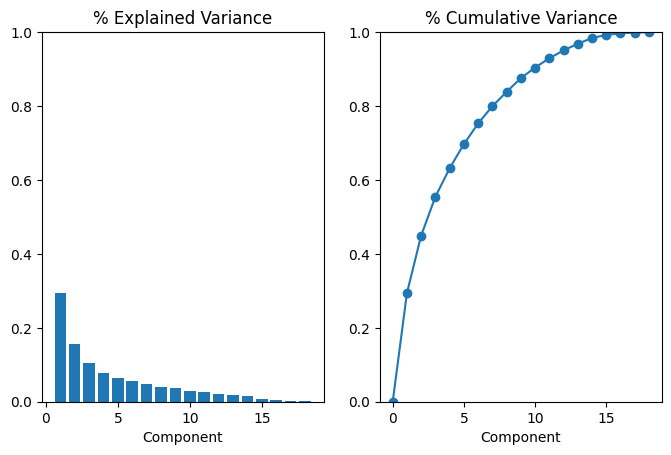

In [ ]:
# Plot PCA variance to check how many PCA components to include that can 
#    explain about 90% of variation.

fig, axs = plt.subplots(1, 2)
n = pca.n_components_
grid = np.arange(1, n + 1)
# Explained variance
evr = pca.explained_variance_ratio_
axs[0].bar(grid, evr)
axs[0].set(
    xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
)
# Cumulative Variance
cv = np.cumsum(evr)
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(
    xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
)
# Set up figure
fig.set(figwidth=8, dpi=100)

By observing cumulative % graph, it apears that 13 to 15 components explain 90% of the variance

In [ ]:
# Compute PCA with 15 components which explains 90% variations.
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [ ]:
# Fit a Decision Tree using PCA components and predict the test resuls.
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train_pca, y_train) 
y_pred = Dtree.predict(X_test_pca)

In [ ]:
print ('accuracy =',accuracy_score(y_test, y_pred))

print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

accuracy = 0.8262910798122066
Recall Score :  0.8262910798122066
Precision Score :  0.8262910798122066
F1 Score :  0.8262910798122065


In [ ]:
# Store accuracy of Decision Tree using PCA
dt_pca_acc = accuracy_score(y_test, y_pred)
dt_pca_acc

0.8262910798122066

In [ ]:
# Decision Tree without PCA
# To verify if there is any change in accuracy of DT if PCA is not used.
Dtree.fit(X_train,y_train)
y_pred = Dtree.predict(X_test)

In [ ]:
print ('accuracy =',accuracy_score(y_test, y_pred))

print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

accuracy = 0.971830985915493
Recall Score :  0.971830985915493
Precision Score :  0.971830985915493
F1 Score :  0.971830985915493


In [ ]:
# Accuracy of DT without PCA is highest and far better than using PCA.
dt_acc = accuracy_score(y_test, y_pred)
dt_acc

0.971830985915493

In [ ]:
knn_acc_pc = round(knn_acc * 100,2)
svm_acc_pc = round(svm_acc * 100,2)
dt_pca_acc_pc = round(dt_pca_acc * 100,2)
dt_acc_pc = round(dt_acc * 100,2)

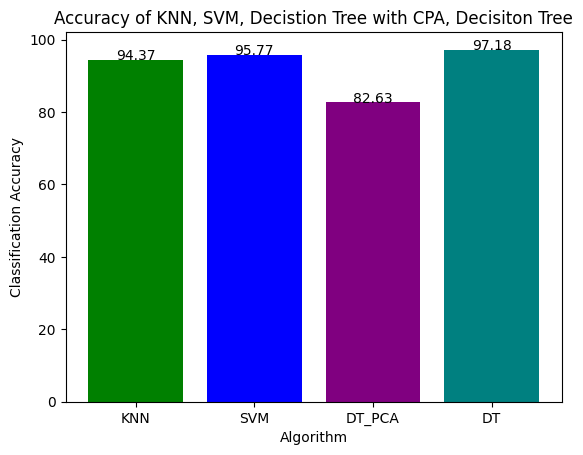

In [ ]:
# plot and compare accuacies of the 3 classification models
algo = ['KNN', 'SVM', 'DT_PCA', 'DT']

acc_val = [knn_acc_pc, svm_acc_pc, dt_pca_acc_pc, dt_acc_pc]

colors = ['green', 'blue', 'purple', 'teal']

plt.bar(algo, acc_val, color=colors)
for i in range(len(algo)):
        plt.text(i, acc_val[i], acc_val[i], ha = 'center')

plt.title('Accuracy of KNN, SVM, Decistion Tree with CPA, Decisiton Tree')
plt.xlabel('Algorithm')
plt.ylabel('Classification Accuracy')
plt.show()